ground state: -3942.0
spin amplitude trajectory: (2000,)
time: 1999


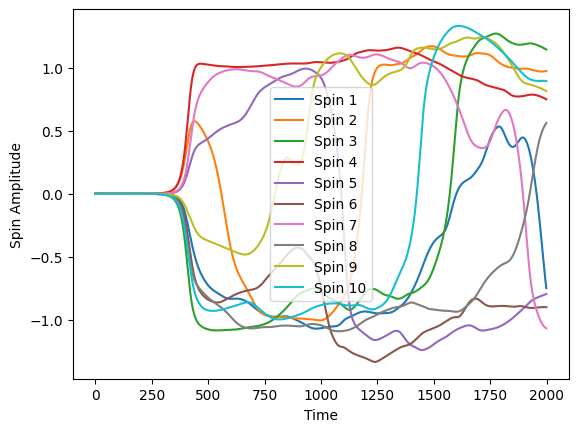

In [4]:
from AHC import *
import numpy as np
import matplotlib.pyplot as plt

Time = 100

file_path = 'G1.txt'

edges = []

with open(file_path, 'r') as file:
    next(file)  # Skip the first row
    for line in file:
        node1, node2, weight = map(int, line.split())  # Convert strings to integers
        edges.append((node1 - 1, node2 - 1, weight))  # Adjust for 0-based indexing

# Determine the number of nodes
num_nodes = max(max(edge[0], edge[1]) for edge in edges) + 1

# Initialize the J matrix with zeros
J_matrix = np.zeros((num_nodes, num_nodes))

# Populate the J matrix based on the edges
for node1, node2, weight in edges:
    J_matrix[node1, node2] = weight
    J_matrix[node2, node1] = weight  # For undirected graphs

# Convert interaction strengths to negative values
J_matrix = -J_matrix

J = J_matrix
solve = CIM_AHC_GPU(Time, J)
spin_config = solve[0]
x_trajectory = solve[1]
T_time = solve[2]
ground_state = solve[3]

# print('spin configuration:', spin_config)   
print('ground state:', np.min(ground_state))
print('spin amplitude trajectory:', x_trajectory[0, 0, :].shape)
print('time:', T_time)

for spin_index in range(10):
    plt.plot(np.arange(T_time+1), x_trajectory[0, spin_index, :], label=f'Spin {spin_index + 1}')
    plt.xlabel('Time')
    plt.ylabel('Spin Amplitude')
    plt.legend()

plt.show()
